In [1]:
#loading the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pydotplus
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO  
from IPython.display import Image
from imblearn.over_sampling import SMOTE


Loading the Dataset with Outliers that is normalized

In [2]:
df = pd.read_csv('../Final_Data_Set/Original Dataset with Outliers Included Normalized.csv')

In [3]:
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,0,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,0,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,0,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,0,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,0,1.561464,1.188813
...,...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,0,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,0,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,0,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,0,-0.640425,-0.841175


In [10]:
X = df.drop('diabetes',axis=1)
y = df['diabetes']

In [11]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded
0,1.692577,0,1,-0.321051,1.001692,0.047709,-0.640425,-0.841175
1,0.537899,0,0,-0.000114,1.001692,-1.426157,-0.640425,-0.841175
2,-0.616779,0,0,-0.000114,0.161089,0.489869,-0.640425,1.188813
3,-0.261494,0,0,-0.583225,-0.492714,0.416175,1.561464,-0.841175
4,1.514935,1,1,-1.081957,-0.679515,0.416175,1.561464,1.188813
...,...,...,...,...,...,...,...,...
99977,1.692577,0,0,-0.000114,0.628091,-1.180513,-0.640425,-0.841175
99978,-1.771458,0,0,-1.499326,0.908292,-0.934869,-0.640425,-0.841175
99979,1.070828,0,0,0.076730,0.161089,0.416175,1.561464,1.188813
99980,-0.794422,0,0,1.220350,-1.426718,-0.934869,-0.640425,-0.841175


In [12]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99977    0
99978    0
99979    0
99980    0
99981    0
Name: diabetes, Length: 99982, dtype: int64

Random Forest

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Applying SMOTE to training set

In [14]:
# Create copies of df
df_copy = df.copy()

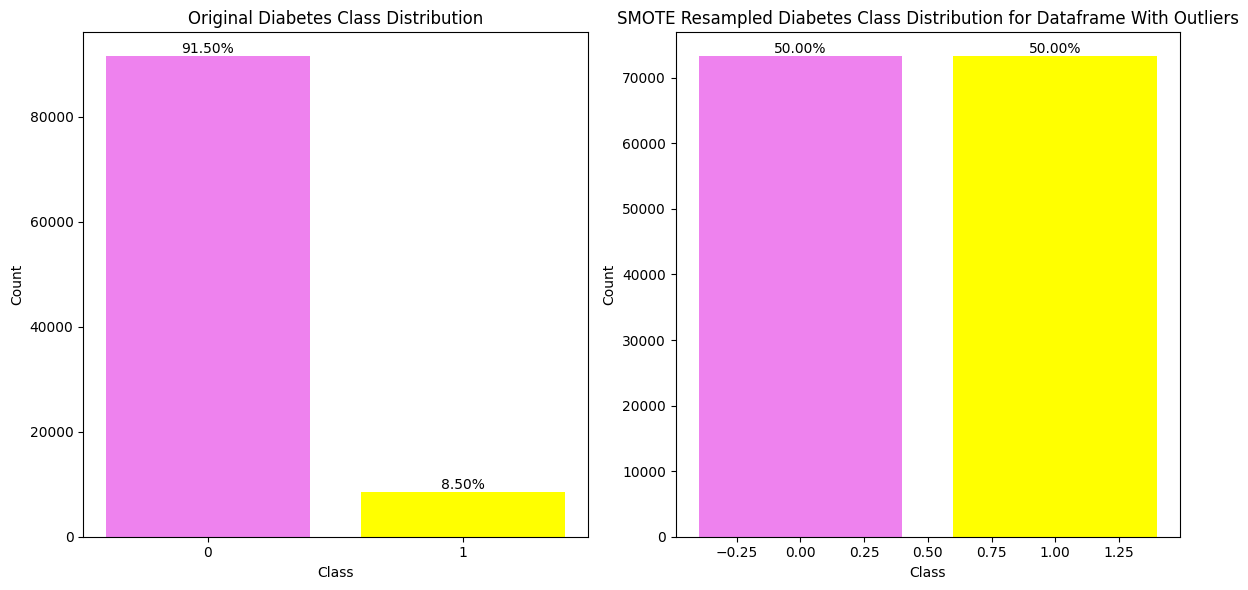

In [15]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_train, y_train = smote.fit_resample(X_train, y_train)

# Count the occurrences of each class in the original dataset
original_class_counts = df["diabetes"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(df) * 100

# Count the occurrences of each class in the resampled dataset
resampled_class_counts = pd.Series(y_train).value_counts()

# Calculate the percentage of each class
resampled_percentages = resampled_class_counts / len(y_train) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original and SMOTE resampled class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Diabetes Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['0', '1'])

plt.subplot(1, 2, 2)
bars_2 = plt.bar(resampled_class_counts.index, resampled_class_counts.values, color=['violet', 'yellow'])
for bar, label in zip(bars_2, resampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('SMOTE Resampled Diabetes Class Distribution for Dataframe With Outliers')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Creating Dataframe from the SMOTE resampled Data

In [16]:
# Create a DataFrame from the SMOTE resampled data
new_df_smote= pd.DataFrame(data=X_train, columns=X_train.columns)
new_df_smote["diabetes"] = y_train

new_df_smote

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_encoded,gender_encoded,diabetes
0,-1.238529,0,0,-0.000114,-0.679515,1.521575,-0.640425,1.188813,0
1,-1.727047,0,0,-1.104559,0.534690,-0.197936,-0.640425,1.188813,0
2,0.404667,0,0,-0.000114,1.375294,-0.197936,-0.640425,1.188813,1
3,-0.616779,0,0,-0.000114,0.534690,1.521575,-0.640425,-0.841175,0
4,-1.416172,0,0,-1.449603,1.001692,-0.934869,-0.640425,1.188813,0
...,...,...,...,...,...,...,...,...,...
146515,0.241555,1,0,3.335427,0.898679,-0.296193,-0.640425,1.188813,1
146516,0.978633,0,0,1.277358,0.161089,0.515366,1.561464,-0.841175,1
146517,-0.524974,0,0,1.892694,0.484135,3.978018,1.561464,-0.841175,1
146518,1.426113,1,0,1.027435,0.624383,0.538997,1.561464,-0.841175,1


Applying Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [22]:
X_train, X_test, y_train, y_test = train_test_split(new_df_smote.drop('diabetes', axis=1), new_df_smote['diabetes'], test_size=0.2, random_state=42)

In [23]:
# Creating the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [24]:
# Training the classifier on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

calculating the metrics

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [28]:
#calculating accuracy score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

#calculating precision score 
y_pred = clf.predict(X_test)
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

#calculating recall score 
y_pred = clf.predict(X_test)
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

#calculating F1 score 
y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred)
print(f"F1: {f1}")

#calculating ROC AUC Score
y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.9781941031941032
Precision: 0.9782623417078621
Recall: 0.9784611216472501
F1: 0.9783617215807118
ROC AUC: 0.9781920463807089
